         Date modi       Open        Low      Close       High  Unnamed: 6
0  01-01-2016    l  45.553741  44.872616  49.095600  49.422543         NaN
1  04-01-2016    l  48.768658  45.907928  46.371094  50.158157         NaN
2  05-01-2016    l  46.670792  45.880684  48.278248  48.823151         NaN
3  06-01-2016    l  47.951309  46.480076  46.997730  48.468964         NaN
4  07-01-2016    l  46.262115  42.502296  43.564854  46.262115         NaN
5  08-01-2016    l  44.681900  43.946285  44.681900  45.226803         NaN
6  11-01-2016    l  44.136997  42.992706  44.872616  45.717213         NaN
(1750, 7)
              Open          Low        Close         High  Unnamed: 6
count  1750.000000  1750.000000  1750.000000  1750.000000         0.0
mean    688.173234   675.238559   688.457278   700.569161         NaN
std    1021.967477  1004.148913  1021.222423  1036.977084         NaN
min      32.149174    31.713251    32.012947    33.402447         NaN
25%      74.134321    72.430996    74.39

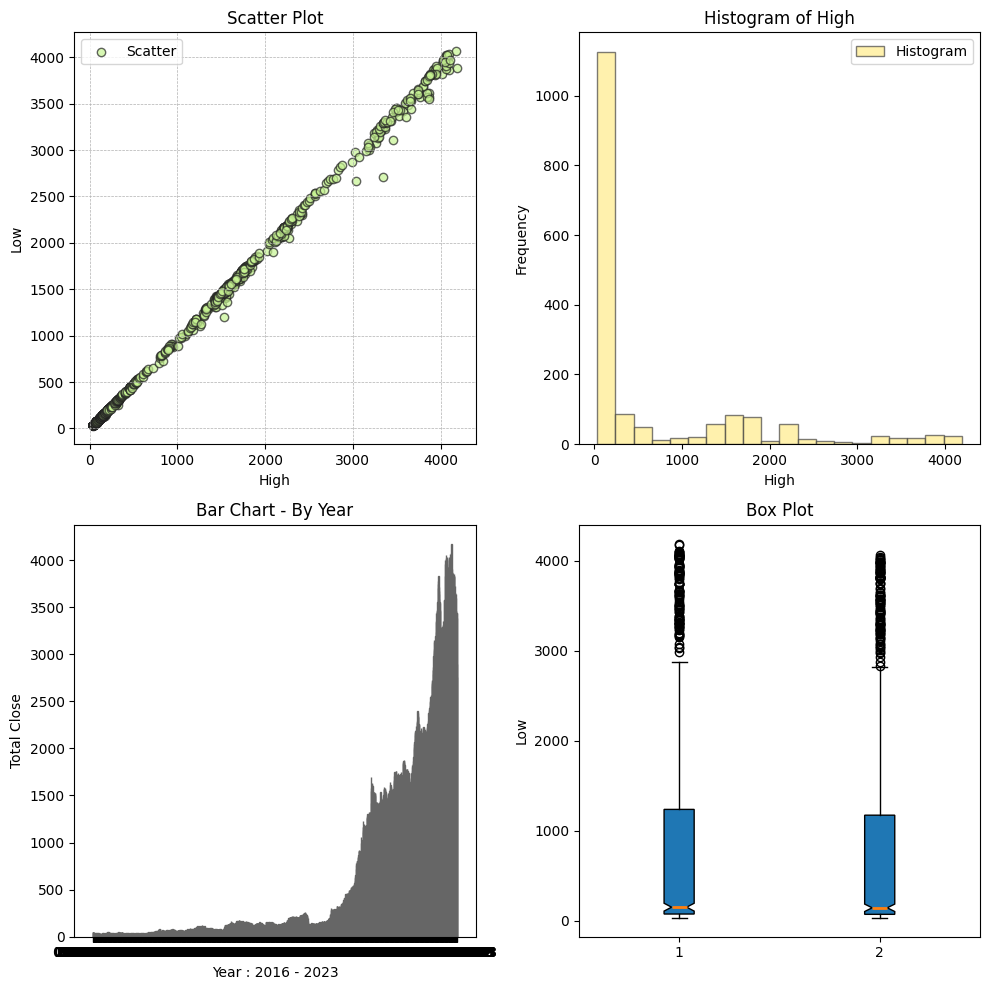

<< ------ >>
1.) Modi wins than Stock price.


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Current Day High Stock Value in NAMO ERA ---> [[40.39631377]]
<< ------ >>
Mean Squared Error: 686.094
Root Mean Squared Error: 26.193
Mean Absolute Error: 19.852


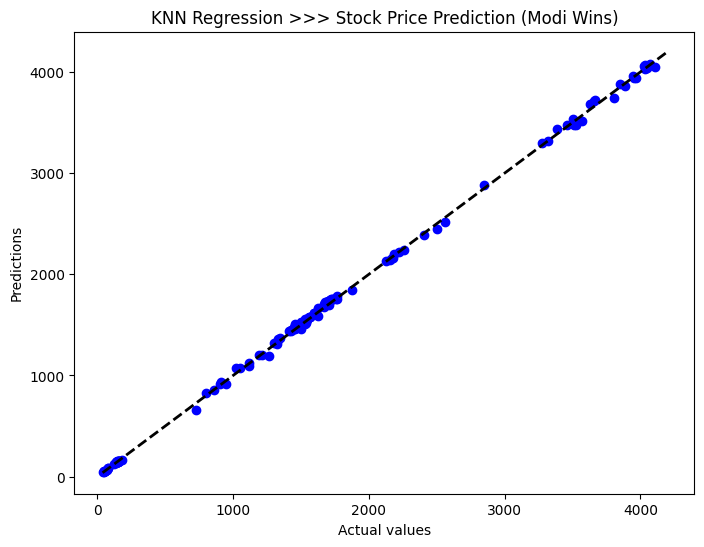

<< ------ >>
2.) Normal Day Stock price.
Current Day Clossing, High, Low Stock Value in Normal Day ---> [[33.42284233 34.13575868 32.68309756]]
Mean Squared Error: 529.042
Root Mean Squared Error: 23.001
Mean Absolute Error: 10.080


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


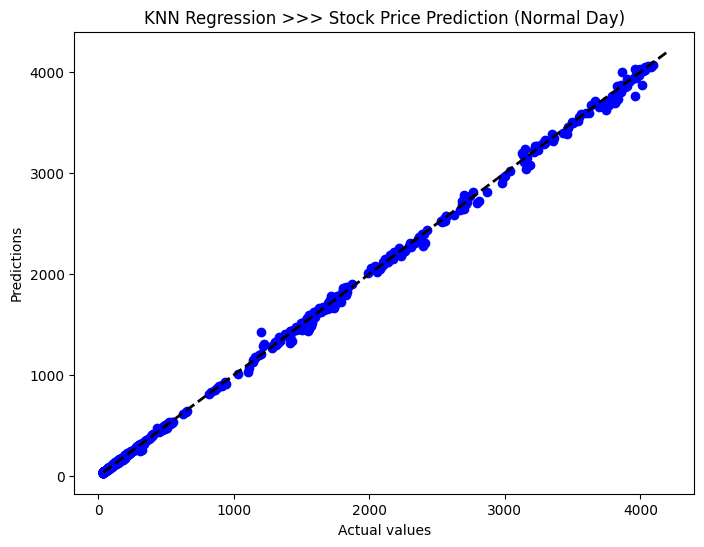

Conclusion : This model can guess the Adani stock price if modi wins the election or in normal day.


In [1]:
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt

# Q1.Stock Price Dataset
df=pd.read_csv("Adani_Stock.csv",header='infer')
print(df.head(7))
print(df.shape)
print(df.describe())
print(df.info())
print("<< ------ >>")

# Q2.Dropping null values
df.dropna(axis=0)
print(df.shape)
print(df.shape)
print("<< ------ >>")

# Q3.Statistics
print("Statistics >>")
print("Stats for Open >>")
print("Stats MEAN>>")
avg = np.mean(df["Open"])
print(avg)
print("Stats: VAR >>")
var = np.var(df["Open"])
print(var)
print("Stats STD_DEV>>")
std = np.std(df["Open"])
print(std)
print("Stats MODE>>")
mode = stat.mode(df["Open"])
print(mode)

print("<< ------ >>")

print("Stats for Close >>")
print("Stats MEAN>>")
avg = np.mean(df["Close"])
print(avg)
print("Stats: VAR >>")
var = np.var(df["Close"])
print(var)
print("Stats STD_DEV>>")
std = np.std(df["Close"])
print(std)
print("Stats MODE>>")
mode = stat.mode(df["Close"])
print(mode)

print("<< ------ >>")

# Q4: Unique Values and Counts
print("\nUnique Value Counts:")
for col in df.columns:
  print(f"{col}: {df[col].value_counts()}")

# Q5.Data Visulization
import matplotlib.pyplot as plt

# Extract data from columns
column1 = df["High"]
column2 = df["Low"]

# Define color palettes (dark and glowing)
dark_colors = ["#222222", "#444444", "#666666"]  # Adjust for your preference
glowing_colors = ["#c7f493", "#ffec8b", "#ffa500"]  # Adjust for your preference

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust figure size as needed

# --- Scatter Plot ---
axes[0, 0].scatter(column1, column2, c=glowing_colors[0], edgecolors=dark_colors[0], alpha=0.7, label="Scatter")
axes[0, 0].set_xlabel("High")
axes[0, 0].set_ylabel("Low")
axes[0, 0].set_title("Scatter Plot")
axes[0, 0].grid(True, which="both", linestyle="--", linewidth=0.5)
axes[0, 0].legend()

# --- Histogram (High) ---
axes[0, 1].hist(column1, bins=20, edgecolor=dark_colors[1], color=glowing_colors[1], alpha=0.7, label="Histogram")
axes[0, 1].set_xlabel("High")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Histogram of High")
axes[0, 1].legend()


# --- Bar Chart ---
axes[1, 0].bar(df["Date"], df["Close"], color=glowing_colors[2], edgecolor=dark_colors[2])
axes[1, 0].set_xlabel("Year : 2016 - 2023")
axes[1, 0].set_ylabel("Total Close")  # Assuming "Close" is the target variable for sum
axes[1, 0].set_title("Bar Chart - By Year")

# --- Box Plot ---
axes[1, 1].boxplot([column1, column2], notch=True, patch_artist=True, vert=True, medianprops={"linewidth": 2})
axes[0, 1].set_xlabel("High")
axes[1, 1].set_ylabel("Low")
axes[1, 1].set_title("Box Plot")
box_colors = [glowing_colors[0], glowing_colors[1]]  # Adjust box colors


# Adjust layout (optional)
plt.tight_layout()

# Display all plots
plt.show()


# Q6.KNN Regression
print("<< ------ >>")

print("1.) Modi wins than Stock price.")

# Split features and target variable

x = df.loc[df["modi"]=='w', "Open"].to_frame(name="Open")  # Creates DataFrame with "Open" column
y = df.loc[df["modi"]=='w', "High"].to_frame(name="High")  # Creates DataFrame with "High" column



# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k=10

model=KNeighborsRegressor(n_neighbors=k, weights='distance') # Create a KNN model object with k=5

# Fit the model using the training set
model.fit(x_train, y_train)
# DIY >> Predictions
p = int(input("Enter Openning Stock Value :"))
pred = np.array([[p]])
prediction = model.predict(pred)
print("Current Day High Stock Value in NAMO ERA --->",prediction)

# Make predictions using the testing set
predictions = model.predict(x_test)
# Calculate and print the root-mean-square error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print("<< ------ >>")

print("Mean Squared Error: {:.3f}".format(mse))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print("Mean Absolute Error: {:.3f}".format(mae))

# Plot the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('KNN Regression >>> Stock Price Prediction (Modi Wins)')
plt.show()
print("<< ------ >>")


print("2.) Normal Day Stock price.")
# Split features and target variable
x1 = df[["Open"]]  
y1 = df[["Close", "High", "Low"]]  

# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

k=10

model1=KNeighborsRegressor(n_neighbors=k, weights='distance') # Create a KNN model object with k=5

# Fit the model using the training set
model1.fit(x1_train, y1_train)
# DIY >> Predictions

pred1 = np.array([[p]])
prediction1 = model1.predict(pred1)
print("Current Day Clossing, High, Low Stock Value in Normal Day --->",prediction1)

# Make predictions using the testing set
predictions1 = model1.predict(x1_test)
# Calculate and print the root-mean-square error
mse = mean_squared_error(y1_test, predictions1)
rmse = np.sqrt(mean_squared_error(y1_test, predictions1))
mae = mean_absolute_error(y1_test, predictions1)

print("Mean Squared Error: {:.3f}".format(mse))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print("Mean Absolute Error: {:.3f}".format(mae))

# Plot the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y1_test, predictions1, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('KNN Regression >>> Stock Price Prediction (Normal Day)')
plt.show()

print("Conclusion : This model can guess the Adani stock price if modi wins the election or in normal day.")

In [2]:
# GUI : Basic Tkinter

import tkinter as tk
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk

df=pd.read_csv("Adani_Stock.csv",header='infer')


# ... your existing code here ... (Assuming any errors in this section are resolved)

# Function to handle predictions based on user input
def predict_stock_price(var1, entry_open_price):
    modi_win = var1.get()
    open_price = float(entry_open_price.get())

    x = df.loc[df["modi"]=='w', "Open"].to_frame(name="Open")  # Creates DataFrame with "Open" column
    y = df.loc[df["modi"]=='w', "High"].to_frame(name="High")  # Creates DataFrame with "High" column



# Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    k=10

    model=KNeighborsRegressor(n_neighbors=k, weights='distance') # Create a KNN model object with k=5

# Fit the model using the training set
    model.fit(x_train, y_train)

    # Split features and target variable
    x1 = df[["Open"]]  
    y1 = df[["Close", "High", "Low"]]  

# Split the dataset into training and testing sets
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

    k=10

    model1=KNeighborsRegressor(n_neighbors=k, weights='distance') # Create a KNN model object with k=5

# Fit the model using the training set
    model1.fit(x1_train, y1_train)
    
    if modi_win == 1:
        # Use existing 'model1' for Modi win prediction (code remains the same)
        pred1 = np.array([[open_price]])
        prediction1 = model.predict(pred1)
        label_high_stock_value.config(text=f"Predicted High Stock Value: {prediction1}")
    else:
        # Use 'model2' for normal day prediction
        pred2 = np.array([[open_price]])
        prediction2 = model1.predict(pred2)

        # Update prediction labels based on selection
        label_high_stock_value.config(text=f"Predicted High Stock Value: {prediction2[0][0]}")
        label_closing_stock_value.config(text=f"Predicted Closing Stock Value: {prediction2[0][1]}")
        label_low_stock_value.config(text=f"Predicted Low Stock Value: {prediction2[0][2]}")

# Create the main GUI window
root = tk.Tk()
root.title("Adani Stock Price Prediction")
root.geometry("1200x1200")  # Set window size
# root.configure(background="black") 

# Add an attractive background image (optional)
# try:
#     background_image = Image.open("modi1.jpg")
    

#     background_photo = ImageTk.PhotoImage(background_image)
#     background_label = tk.Label(root, image=background_photo)
#     background_label.place(x=0, y=0, relwidth=1, relheight=1)
# except Exception as e:
#     print("An error occurred while loading the image:", e)
try:
  background_image = Image.open("modi1.jpg")
  background_photo = ImageTk.PhotoImage(background_image)
  background_label = tk.Label(root, image=background_photo)
  background_label.place(x=0, y=250, relwidth=1, relheight=1)  # Adjust y position to 100
except Exception as e:
  print("An error occurred while loading the image:", e)



# Title label
title_label = tk.Label(root, text="Adani Stock Price Prediction",fg = "green", font=("Arial", 60))
title_label.pack(pady=20)

# Modi win option frame
modi_win_frame = tk.Frame(root)
modi_win_frame.pack()

var1 = tk.IntVar()  # Declare var1 to store Modi win selection

radio_modi_win = tk.Radiobutton(modi_win_frame, text="Modi Wins",fg = "red", variable=var1, value=1, font=("Arial", 22))
radio_modi_win.pack(side=tk.LEFT)
radio_normal_day = tk.Radiobutton(modi_win_frame, text="Normal Day",fg = "blue", variable=var1, value=2, font=("Arial", 22))
radio_normal_day.pack(side=tk.LEFT)

# Open price entry frame
open_price_frame = tk.Frame(root)
open_price_frame.pack(pady=10)

label_open_price = tk.Label(open_price_frame, text="Enter Opening Stock Price:", font=("Arial", 32))
label_open_price.pack(side=tk.LEFT)
entry_open_price = tk.Entry(open_price_frame, width=15, font=("Arial", 22))
entry_open_price.pack(side=tk.LEFT)

# Predict button
button_predict = tk.Button(root, text="Predict Stock Price", command=lambda: predict_stock_price(var1, entry_open_price), font=("Arial", 29))
button_predict.pack(pady=15)

# Prediction labels frame
prediction_frame = tk.Frame(root)
prediction_frame.pack()

label_high_stock_value = tk.Label(prediction_frame, text="",fg = "green", font=("Arial", 22))
label_high_stock_value.pack()
label_closing_stock_value = tk.Label(prediction_frame, text="",fg = "red", font=("Arial", 22))
label_closing_stock_value.pack()
label_low_stock_value = tk.Label(prediction_frame, text="",fg = "blue", font=("Arial", 22))
label_low_stock_value.pack()

# Run the main event loop
root.mainloop()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
